In [1]:
from google.colab import files
uploaded = files.upload()


Saving CNN.jpg to CNN.jpg


In [2]:
!pip install opencv-python-headless


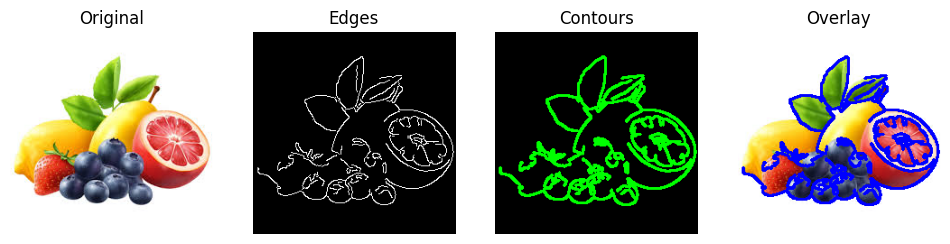

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load uploaded image
image = cv2.imread(list(uploaded.keys())[0])

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection
edges = cv2.Canny(blur, 100, 200)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Blank image for contours
contour_image = np.zeros_like(image)

# Draw contours
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Overlay contours on original
overlay = image.copy()
cv2.drawContours(overlay, contours, -1, (255, 0, 0), 2)

# Display results
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,4,2)
plt.title("Edges")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.subplot(1,4,3)
plt.title("Contours")
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1,4,4)
plt.title("Overlay")
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()
